In [ ]:
!pip install -q oauth2client==1.5.2
import sys
sys.path.append("./utils/student_function/")
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from mooclib import *
import inspect, urllib
html, auth_code, userinfo = google_authenticate(PORT_NUMBER=8080)
html

## Ejercicio 1

crea el constructor de un grafo que se representa como una lista de nodos conectados para cada nodo. Por ejemplo:

    g1 = st.Graph(num_nodes=4, edge_list=[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)])
    print g1.nodes

    > {0: [1, 2, 3], 1: [0, 2, 3], 2: [0, 1, 3], 3: [0, 1, 2]}
    
o también en el caso de un grafo dirigido:

    g1 = st.Graph(num_nodes=4, edge_list=[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)], is_directed=True)
    print g1.nodes
    
    > {0: [1, 2, 3], 1: [2, 3], 2: [1, 3], 3: []}

observa que, 

- si tenemos un grafo dirigido y el lado $(V_i, V_j)$, entonces $i$ ha de estar en la lista de nodos de $j$ y viceversa.
- en cambio, con un grafo dirigido, sólo $i$ ha de estar en la lista de nodos de $j$.
- la lista de nodos conectados con cada nodo ha de quedar **compacta**, no puede haber nodos repetidos. P.ej. si en la lista de lados se encuentran ambos (5,1) y (1,5), o hay lados repetidos.

In [ ]:
%%writefile ./utils/student_function/PS08_01.py
import numpy as np
class Graph:
    
    def __init__(self, num_nodes, edge_list, is_directed=False):
        
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        self.is_directed = is_directed
        self.num_nodes   = num_nodes

        self.nodes = # ...  TU CODIGO AQUI ...
                     # (1) crea el diccionario
                     # (2) recorre la lista de edges rellenando los valores del diccionario
                     # (3) elimina los elementos duplicados en las listas del diccionario
        


prueba tu código

In [ ]:
import PS08_01 as st
reload(st)
g1 = st.Graph(4, [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)])
print g1.nodes

In [ ]:
g1 = st.Graph(4, [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (2,1)], is_directed=True)
print g1.nodes

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS08_01

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS08_01

## Ejercicio 2

completa el método `as_nx` para crear el grafo de `networkx` correspondiente. Revisa la documentación de `networkx.Graph` y de `networkx.DiGraph`. Ten en cuenta que:

- la clase para grafos no dirigidos es `networkx.Graph`
- la clase para grados dirigidos es `networkx.DiGraph`
- en cualquiera de los dos casos el método para añadir nodos es `add_nodes_from`
- en cualquiera de los dos casos el método para añadir lados es `add_edge`

Una vez hayas implementado tu método, puedes usar `draw` para visualizar el grafo.

In [ ]:
%%writefile ./utils/student_function/PS08_02.py
import numpy as np
import networkx as nx

class Graph:
    def __init__(self, num_nodes, edge_list, is_directed=False):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
       # COPIA AQUI EL CODIGO DEL EJERCICIO ANTERIOR 
                
    def as_nx(self):
        g = # TU CODIGO AQUI 
        return g
    
    def draw(self):
        ng = self.as_nx()
        nx.drawing.draw(ng, arrows=self.is_directed, with_labels=True, 
                        node_alpha=.2, node_color="blue", 
                        node_size=900, font_color="white")

prueba tu código

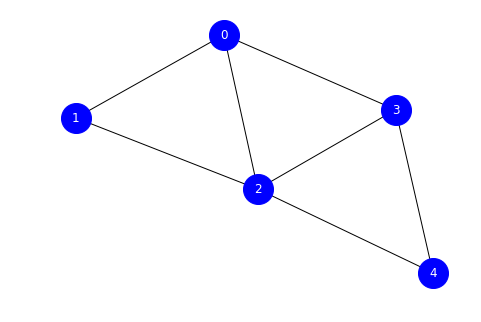

In [35]:
import PS08_02 as st
reload(st)
import matplotlib.pyplot as plt
%matplotlib inline

g1 = st.Graph(5, [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3), (2,4), (3,4)])
g1.draw()

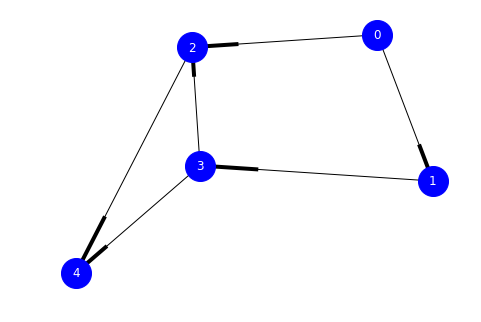

In [36]:
g2 = st.Graph(5, [(0,1), (0,2), (1,3), (2,4), (3,4), (3,2)], is_directed=True)
g2.draw()

In [ ]:
!./run CHECK_SOLUTION PS08_02

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS08_02

## Ejercicio 3

implementa los métodos indicados para tu clase con la implementación del grafo como un diccionario de listas de nodos conectados.

In [ ]:
%%writefile ./utils/student_function/PS08_03.py
import numpy as np
import networkx as nx
class Graph():

    def __init__(self, num_nodes, edge_list, is_directed=False):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        # COPIA AQUI EL CODIGO DEL CONSTUCTOR
    
    def assert_valid_node_number(self, n):
        assert n>=0 and n<self.num_nodes, "invalid node number: %d"%n        
    
    def grade(self, node_number):
        self.assert_valid_node_number(node_number)
        return # .. TU CODIGO AQUI
    
    def grade_out(self, node_number):
        assert self.is_directed, "only directed graphs have in/out grades"
        self.assert_valid_node_number(node_number)
        
        return # .. TU CODIGO AQUI

    def grade_in(self, node_number):
        assert self.is_directed, "only directed graphs have in/out grades"
        self.assert_valid_node_number(node_number)
        
        return # .. TU CODIGO AQUI

    def are_adyacent(self, node_number_1, node_number_2):
        self.assert_valid_node_number(node_number_1)
        self.assert_valid_node_number(node_number_2)
        
        return # .. TU CODIGO AQUI
        
    def is_valid_trayectory(self, trayectory):
        assert type(trayectory)==list, "trayectory must be a list"
            
        return # .. TU CODIGO AQUI
    
    

In [ ]:
import PS08_03 as st
reload(st)
g1 = st.Graph(4, [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)])
for i in range(g1.num_nodes):
    print "node",i, ", grade =", g1.grade(i)    

In [ ]:
g3 = st.Graph(4, [(0,1), (1,0), (1,2), (2,0), (2,3)], is_directed=True)
for i in range(g3.num_nodes):
    print "node",i, ", grade_in =", g3.grade_in(i),", grade_out =", g3.grade_out(i)

In [ ]:
print g3.are_adyacent(0,1)
print g3.are_adyacent(3,2)
print g3.are_adyacent(0,3)


In [ ]:
t1 = [ 0, 1, 2, 3]
t2 = [ 0, 2, 1]
t3 = [ 2,0,1,0]
print "          trayectory    is_valid "
for t in [t1, t2, t3]:
    print "%20s"%str(t), "%10s"%g3.is_valid_trayectory(t)

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS08_03

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS08_03

## Ejercicio 4

Realiza el constructor para que inicialice una representación como una matriz de incidencia. Asumamos que tenemos **solamente grafos NO dirigidos**, no tengas el cuenta el caso de grafos dirigidos.

Una **matric de incidencia** es una matriz de m filas y n columnas siendo:

- m = número vértices del grafo.
- n = número lados del grafo.

Lo anterior implica que debemos numerar los lados del grafo. Dicha numeración se hace aleatoriamente, o se puede hacer en secuencia con la lista de lados (edges).

Fíjate en el siguiente grafo de ejemplo y la matriz de incidencia asociada cualquier columna tiene exactamente dos elementos a 1:

    g2 = st.Graph(7, [(1,4),(0,2), (2,5),(0,1), (1,3), (2,6)])
    g2.inc_matrix
    
    > [[0 1 0 1 0 0]
    >  [1 0 0 1 1 0]
    >  [0 1 1 0 0 1]
    >  [0 0 0 0 1 0]
    >  [1 0 0 0 0 0]
    >  [0 0 1 0 0 0]
    >  [0 0 0 0 0 1]]
    

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%%writefile ./utils/student_function/PS08_04.py
import numpy as np
class Graph:
    def __init__(self, num_nodes, edge_list):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        self.num_nodes   = num_nodes

        # TU CODIGO AQUI


In [ ]:
import PS08_04 as st
reload(st)
g2 = st.Graph(7, [(1,4),(0,2), (2,5),(0,1), (1,3), (2,6)])
print g2.inc_matrix

In [ ]:
k = g2.inc_matrix
k.sum(axis=0)

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS08_04

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS08_04

## Ejercicio 5

implementa los métodos siguientes para la clase anterior con matrices de incidencia:

- `grade`
- `are_adyacent`
- `is_valid_trayectory`

In [ ]:
%%writefile ./utils/student_function/PS08_05.py
import numpy as np
class Graph:
    def __init__(self, num_nodes, edge_list):
        assert type(edge_list)==list, "edge_list must be a list of tuples"
        assert type(num_nodes)==int, "num_nodes must be an int"
        
        for t in edge_list:
            assert len(t)==2, "edge_list must be a list of tuples"
            assert t[0]<num_nodes and t[0]>=0 and t[1]<num_nodes and t[1]>=0, "edge number not allowed " + str(t)
        
        # COPIA AQUI EL CONSTRUCTOR DEL EJERCICIO ANTERIOR
    
    def assert_valid_node_number(self, n):
        assert n>=0 and n<self.num_nodes, "invalid node number: %d"%n        
    
    def grade(self, node_number):
        self.assert_valid_node_number(node_number)
        return # TU CODIGO AQUI
    
    def are_adyacent(self, node_number_1, node_number_2):
        self.assert_valid_node_number(node_number_1)
        self.assert_valid_node_number(node_number_2)
        
        return # TU CODIGO AQUI
        
    def is_valid_trayectory(self, trayectory):
        assert type(trayectory)==list, "trayectory must be a list"
        
        return # TU CODIGO AQUI

In [ ]:
import PS08_05 as st
reload(st)
g1 = st.Graph(4, [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3)])
for i in range(g1.num_nodes):
    print "node",i, ", grade =", g1.grade(i)    

In [ ]:
print g3.are_adyacent(0,1)
print g3.are_adyacent(3,2)
print g3.are_adyacent(0,3)


In [ ]:
g3 = st.Graph(4, [(0,1), (1,0), (1,2), (2,0), (2,3)])
t1 = [ 0, 1, 2, 3]
t2 = [ 0, 2, 3,1]
t3 = [ 2,0,1,0]
print "          trayectory    is_valid "
for t in [t1, t2, t3]:
    print "%20s"%str(t), "%10s"%g3.is_valid_trayectory(t)

#### comprueba tu código con el corrector automático

In [ ]:
!./run CHECK_SOLUTION PS08_05

#### registra tu solución en línea

In [ ]:
!./run SUBMIT_SOLUTION PS08_05